In [1]:
import sys, os

# Add project root so that `src` package is discoverable
project_root = os.path.abspath(os.path.join("..", ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [ ]:
# import os
# import pickle

# def load_pkl():
#     # Get project root (2 levels up from notebook folder)
#     project_root = os.path.abspath(os.path.join("..", ".."))
#     file_path = os.path.join(project_root, "datapkl", "annot_all.pkl")

#     with open(file_path, "rb") as file:
#         videos_annot = pickle.load(file)
#     return videos_annot, file_path

# videos_annot_dct, file_path = load_pkl()






# from src.enums.PathEnums import Paths
# data_annot = []
# labels = set()


# for video_id, clips in videos_annot_dct.items():  # each video
    
#     for clip_id, clip_data in clips.items():  # each clip
#         category = clip_data['category']
#         labels.add(category)
        
#         for frame_id, boxes in clip_data["frame_boxes_dct"].items(): # Frames

#             frame_path = f"{Paths.VIDEOS_ROOT.value}/{video_id}/{clip_id}/{frame_id}.jpg"
#             data_annot.append(
#                 {
#                 "path": frame_path,
#                 "category" :category
#                 }
#             )

# print(f"{len(labels)} labels: {labels}\n\n")

# categories_dct = {
#         'l-pass': 0,
#         'r-pass': 1,
#         'l-spike': 2,
#         'r_spike': 3,
#         'l_set': 4,
#         'r_set': 5,
#         'l_winpoint': 6,
#         'r_winpoint': 7
#     }


# len_dataset = len(data_annot)
# len_dataset, int(len_dataset*0.6), int(len_dataset*0.3), int(len_dataset*0.1)

# from pathlib import Path


# # Group-Activity-Recognition/data


# FRAMES_PATH = Path("../../FramesData/")
# TRAIN_PATH =  FRAMES_PATH / "train"
# VALID_PATH = FRAMES_PATH / "valid"
# TEST_PATH = FRAMES_PATH / "test"
# print(TRAIN_PATH, VALID_PATH, TEST_PATH)

# if FRAMES_PATH.is_dir():
#     print(f"{FRAMES_PATH} directory exists.")


# FRAMES_PATH.mkdir(parents=True, exist_ok=True)
# TRAIN_PATH.mkdir(parents=True, exist_ok=True)
# VALID_PATH.mkdir(parents=True, exist_ok=True)
# TEST_PATH.mkdir(parents=True, exist_ok=True)



In [2]:
import os
import pickle

def load_pkl():
    # Get project root (2 levels up from notebook folder)
    project_root = os.path.abspath(os.path.join("..", ".."))
    file_path = os.path.join(project_root, "datapkl", "annot_all.pkl")

    with open(file_path, "rb") as file:
        videos_annot = pickle.load(file)
    return videos_annot, file_path

videos_annot_dct, file_path = load_pkl()

In [3]:
print(len(videos_annot_dct))

55


In [4]:
from src.enums.PathEnums import Paths
data_annot = []
labels = set()


for video_id, clips in videos_annot_dct.items():  # each video
    
    for clip_id, clip_data in clips.items():  # each clip
        category = clip_data['category']
        labels.add(category)
        
        for frame_id, boxes in clip_data["frame_boxes_dct"].items(): # Frames

            frame_path = f"{Paths.VIDEOS_ROOT.value}/{video_id}/{clip_id}/{frame_id}.jpg"
            data_annot.append(
                {
                "path": frame_path,
                "category" :category
                }
            )

print(f"{len(labels)} labels: {labels}\n\n")

categories_dct = {
        'l-pass': 0,
        'r-pass': 1,
        'l-spike': 2,
        'r_spike': 3,
        'l_set': 4,
        'r_set': 5,
        'l_winpoint': 6,
        'r_winpoint': 7
    }

8 labels: {'l-spike', 'l_winpoint', 'r_set', 'r_winpoint', 'l_set', 'l-pass', 'r_spike', 'r-pass'}




In [5]:
for frame_dct in data_annot:
    for path, cat in frame_dct.items():
        print(frame_dct["path"], "==>", frame_dct["category"])
        break
    break

data/volleyball/volleyball_/videos/0/13286/13281.jpg ==> r_set


In [6]:
len_dataset = len(data_annot)
len_dataset, int(len_dataset*0.6), int(len_dataset*0.3), int(len_dataset*0.1)

(43470, 26082, 13041, 4347)

In [7]:
int(len_dataset*0.6) +  int(len_dataset*0.3) + int(len_dataset*0.1)

43470

In [24]:
from pathlib import Path


# Group-Activity-Recognition/data


FRAMES_PATH = Path("../../FramesData/")
TRAIN_PATH =  FRAMES_PATH / "train"
VALID_PATH = FRAMES_PATH / "valid"
TEST_PATH = FRAMES_PATH / "test"
print(TRAIN_PATH, VALID_PATH, TEST_PATH)

if FRAMES_PATH.is_dir():
    print(f"{FRAMES_PATH} directory exists.")


FRAMES_PATH.mkdir(parents=True, exist_ok=True)
TRAIN_PATH.mkdir(parents=True, exist_ok=True)
VALID_PATH.mkdir(parents=True, exist_ok=True)
TEST_PATH.mkdir(parents=True, exist_ok=True)



../../FramesData/train ../../FramesData/valid ../../FramesData/test


In [25]:
import random

random.shuffle(data_annot)  # shuffle before splitting

n_total = len(data_annot)
n_train = int(0.6 * n_total)
n_valid = int(0.3 * n_total)
n_test = n_total - n_train - n_valid

train_data = data_annot[:n_train]
valid_data = data_annot[n_train:n_train+n_valid]
test_data  = data_annot[n_train+n_valid:]

In [26]:
print(len(train_data), n_train)
print(len(valid_data), n_valid)
print(len(test_data), n_test)


26082 26082
13041 13041
4347 4347


In [27]:
for item in train_data:
    print(item["path"])
    print(item["category"])
    break

data/volleyball/volleyball_/videos/14/54185/54182.jpg
l-spike


In [28]:
path = Path(r'../../data/volleyball/volleyball_/videos/42/37915/37915.jpg')
vid_num = path.parents[1].name
s = os.path.basename(path)
print(vid_num, s)
# os.path.exists(path)

42 37915.jpg


In [30]:
import shutil

def save_split(data_split, split_path):
    print(f"start, {split_path} ")
    i=0

    for item in data_split:

        src = os.path.join("../../", Path(item["path"]))
        label = item["category"]
        dst_dir = split_path / label
        dst_dir.mkdir(parents=True, exist_ok=True)

        # print(src, os.path.exists(src))
        # print(label)
        # print(dst_dir)


        vid_num = Path(src).parents[1].name
        dst = dst_dir / f"vid_{vid_num}_{os.path.basename(src)}"
        dst = dst_dir / f"vid_{vid_num}_{os.path.basename(src)}"

        # print(vid_num)
        # print(dst)


        try:
            if os.path.exists(dst):
                # print("override", dst)
                i-=1
            shutil.copy(src, dst)
            i+=1

        except Exception as e:
            print(f"Error copying {src} → {dst}: {e}")

    print(i)

print(f"train {n_train}")
save_split(train_data, TRAIN_PATH)

print(f"valid {n_valid}")
save_split(valid_data, VALID_PATH)

print(f"test {n_test}")
save_split(test_data, TEST_PATH)

train 26082
start, ../../FramesData/train 


25963
valid 13041
start, ../../FramesData/valid 
13002
test 4347
start, ../../FramesData/test 
4344


In [32]:
def get_list_of_directories(dir_path):
    """Returns a list of directory names (not full paths) in dir_path."""
    return [
        directory for directory in os.listdir(dir_path)
        if os.path.isdir(os.path.join(dir_path, directory))
    ]

get_list_of_directories(TRAIN_PATH)

['r_winpoint',
 'l_winpoint',
 'l-spike',
 'l_set',
 'l-pass',
 'r_spike',
 'r-pass',
 'r_set']

In [37]:
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents. """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    if len(dirnames) > 0:
        dirs = get_list_of_directories(dirpath)
        print(f"There are {len(dirnames)} directories, {dirs}")
    if len(filenames) > 0:
        print(f"    There are {len(filenames)} images in '{dirpath}'.")

# data_path = Path("data/")
# image_path = data_path / "pizza_steak_sushi"
walk_through_dir(FRAMES_PATH)

There are 3 directories, ['train', 'test', 'valid']
There are 8 directories, ['r_winpoint', 'l_winpoint', 'l-spike', 'l_set', 'l-pass', 'r_spike', 'r-pass', 'r_set']
    There are 1605 images in '../../FramesData/train/r_winpoint'.
    There are 1983 images in '../../FramesData/train/l_winpoint'.
    There are 3392 images in '../../FramesData/train/l-spike'.
    There are 3353 images in '../../FramesData/train/l_set'.
    There are 4474 images in '../../FramesData/train/l-pass'.
    There are 3306 images in '../../FramesData/train/r_spike'.
    There are 4366 images in '../../FramesData/train/r-pass'.
    There are 3484 images in '../../FramesData/train/r_set'.
There are 8 directories, ['r_winpoint', 'l_winpoint', 'l-spike', 'l_set', 'l-pass', 'r_spike', 'r-pass', 'r_set']
    There are 272 images in '../../FramesData/test/r_winpoint'.
    There are 338 images in '../../FramesData/test/l_winpoint'.
    There are 558 images in '../../FramesData/test/l-spike'.
    There are 573 images in

Image path: ../../FramesData/train/r_winpoint/vid_25_44431.jpg
Image class: r_winpoint
Image shape: (720, 1280, 3)


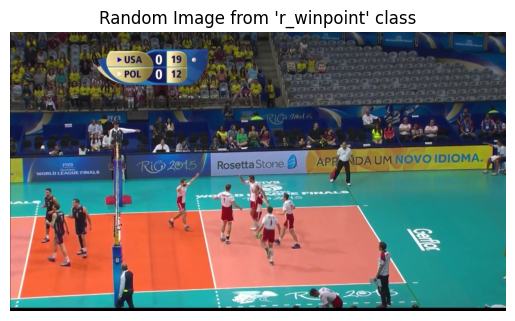

In [39]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def plot_random_image_from_dir(dir_path):
    """Prints a random image from dir_path."""

    def get_list_of_files(dir_path):
        """ Returns a list of files in dir_path. """
        return [os.path.join(dir_path, file) for file in os.listdir(dir_path)]

    image_path_list = get_list_of_files(dir_path)
    random_image_path = random.choice(image_path_list)
    img = Image.open(random_image_path)

    img_as_array = np.array(img)
    image_class = os.path.basename(os.path.dirname(random_image_path))

    print(f"Image path: {random_image_path}")
    print(f"Image class: {image_class}")
    print(f"Image shape: {img_as_array.shape}")
    plt.imshow(img_as_array)
    plt.title(f"Random Image from '{image_class}' class")
    plt.axis('off')
plot_random_image_from_dir(TRAIN_PATH/ 'r_winpoint')

Image path: ../../FramesData/test/r_winpoint/vid_9_36689.jpg
Image class: r_winpoint
Image shape: (720, 1280, 3)


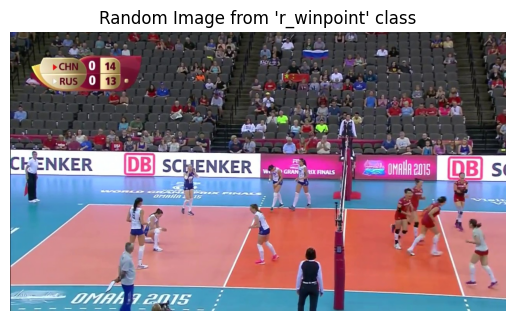

In [40]:
plot_random_image_from_dir(TEST_PATH/ 'r_winpoint')